# Notebook 19: Turing Machine variants

In [ ]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2024 /content/theory
%cd -q /content/theory/notes

<div class="alert alert-info">
    <p><b>Read</b> page 176.</p>
</div>    

**Question.** Name every possible thing you could imagine adding to a Turing machine to make it more powerful.

First of all, there were already some extensions in Turing's image of a human computer:

- They are allowed to look at multiple (but finitely many) squares at a time.
- They are allowed to move multiple (but finitely many) squares to the left or right.
- Furthermore, Turing also mentions the possibility of a two-dimensional grid.

Turing argued in his original paper that a TM which can look at multiple squares or move multiple squares can be converted into a standard TM by adding more states. A two dimensional grid can be simulated in a manner similar to multiple tapes (see below).

The book discusses one simple extension ("stay" transitions) and two bigger extensions which are used later: multiple tapes, and nondeterminism.

## Stay transitions

"Stay" transitions are a good example of how to write proofs concerning TM extensions. We want to show: For any TM $M$ with "stay" transitions, there is a standard TM $M'$ that is equivalent to $M$.

If you are asked to show how to construct a *formal description* of $M'$, this doesn't mean you should write a particular formal description; you should write English instructions for how to construct a formal description, like so:

For each stay transition

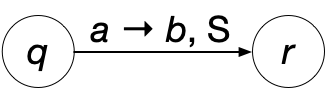

Replace it with the transitions

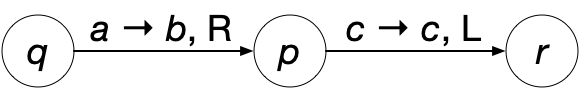

where
- $p$ is a new state, not used anywhere else in the machine.
- there is a transition from $p$ to $r$ for all possible $c \in \Gamma$.

We could make this more formal still by saying: Given $M = (Q, \Sigma, \Gamma, \delta, q_0, q_{\text{accept}}, q_{\text{reject}})$, where $\delta$ allows stay (S) transitions, construct $M' = (Q, \Sigma, \Gamma, \delta', q_0, q_{\text{accept}}, q_{\text{reject}})$, where

\begin{align*}
\delta'(q, a) &= (r, b, \text{L}) & \text{if}~\delta(q, a) &= (r, b, \text{L}) \\
\delta'(q, a) &= (r, b, \text{R}) & \text{if}~\delta(q, a) &= (r, b, \text{R}) \\
\delta'(q, a) &= (p_{qa}, b, \text{R}) & \text{if}~\delta(q, a) &= (r, b, \text{S}) \\
\delta'(p_{qa}, c) &= (r, c, \text{L}) & \text{if}~\delta(q, a) &= (r, b, \text{S}), \text{for all $c \in \Sigma$} \\
\end{align*}

If you are asked to write an *implementation-level description* of $M'$, it would be something like:

$M' =$ "On input $w$:

1. Simulate $M$ on $w$, with the following modifications:
    - When a transition of $M$ moves left, move left.
    - When a transition of $M$ moves right, move right.
    - When a transition of $M$ stays, first move right, then move left.

## Multiple tapes

<div class="alert alert-info">
    <p><b>Read</b> the subsection "Multitape Turing Machines" (176–178).</p>
</div>

Multiple tapes are an especially useful extension of Turing machines. We will make use of them later on, and they are often used in papers in place of standard Turing machines.

(When we ask you to write a TM, you should assume unless stated otherwise that this means a standard TM, so don't use multiple tapes.)

Here's an example of a multitape TM that recognizes the language $\{ w \texttt{#} w \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$ without having to "zig-zag." The implementation-level description is:

1. Scan right on the first tape, copying symbols to the second tape until $\texttt{#}$ is reached.
2. Move past the $\texttt{#}$ on the first tape and move the second head to the left end.
3. Scan right on both tapes, checking at each step that the symbols under both heads are equal.
4. If so, *accept*; else, *reject*.

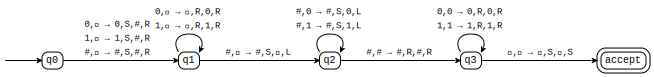

In [ ]:
mtm = read_csv("multitape.csv")
mtm

In [ ]:
run(mtm, '1 0 1 # 1 0 1').only_path()

q0,[1] 0 1 # 1 0 1,ε
q1,[1] 0 1 # 1 0 1,# [␣]
q1,␣ [0] 1 # 1 0 1,# 1 [␣]
q1,␣ ␣ [1] # 1 0 1,# 1 0 [␣]
q1,␣ ␣ ␣ [#] 1 0 1,# 1 0 1 [␣]
q2,␣ ␣ ␣ [#] 1 0 1,# 1 0 [1] ␣
q2,␣ ␣ ␣ [#] 1 0 1,# 1 [0] 1 ␣
q2,␣ ␣ ␣ [#] 1 0 1,# [1] 0 1 ␣
q2,␣ ␣ ␣ [#] 1 0 1,[#] 1 0 1 ␣
q3,␣ ␣ ␣ # [1] 0 1,# [1] 0 1 ␣
q3,␣ ␣ ␣ # 1 [0] 1,# 1 [0] 1 ␣


The reduction to standard TMs converts a multitape configuration like this:

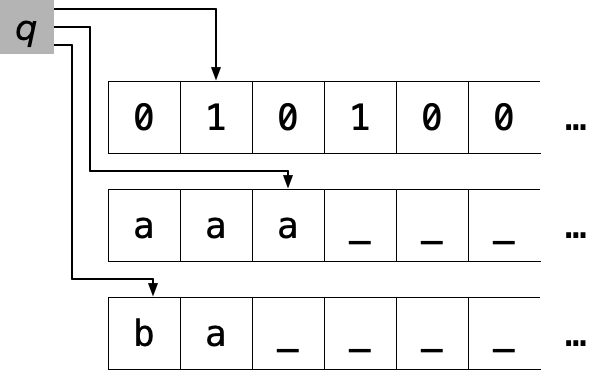

Into a single-tape configuration like this:

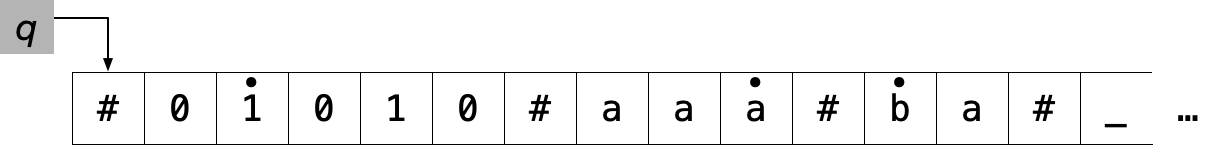

This doesn't constitute a proof; see the book for how to write a proof using an implementation-level description.